In [69]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [71]:
# Importing dataset from previous exercise
path=r'C:\Users\aditi\Desktop\Data Analytics_Career Foundry\Data Analytics_Immersion\Project 4\Instacart Basket Analysis'

In [73]:
ords_prods_merge=pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'ords_prods_grouped.pkl'))

# Plotting Bar chart

<Axes: xlabel='orders_day_of_week'>

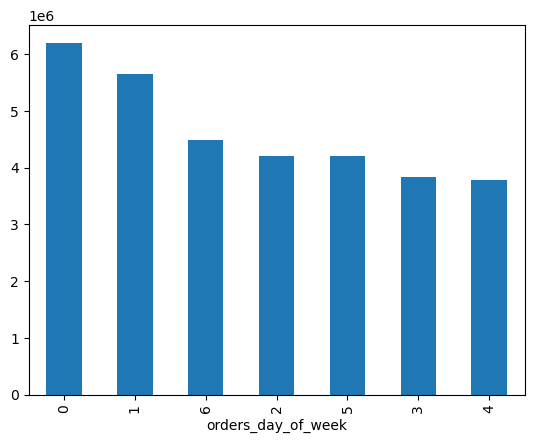

In [75]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

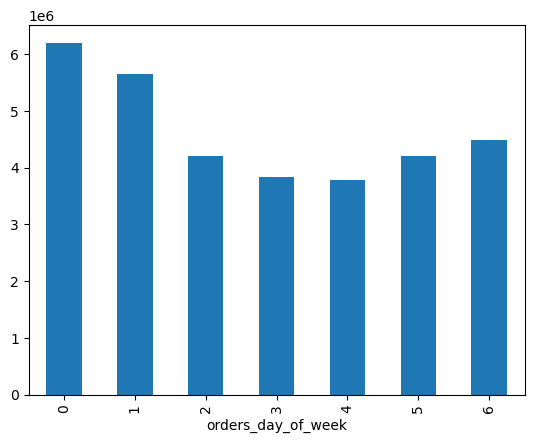

In [76]:
bar=ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

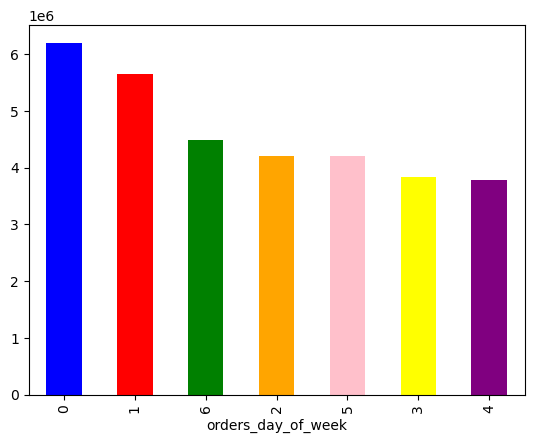

In [77]:
bar=ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['blue','red','green','orange','pink','yellow','purple'])

In [78]:
# Exporting bar chart
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

# Histograms & Scatterplots

<Axes: ylabel='Frequency'>

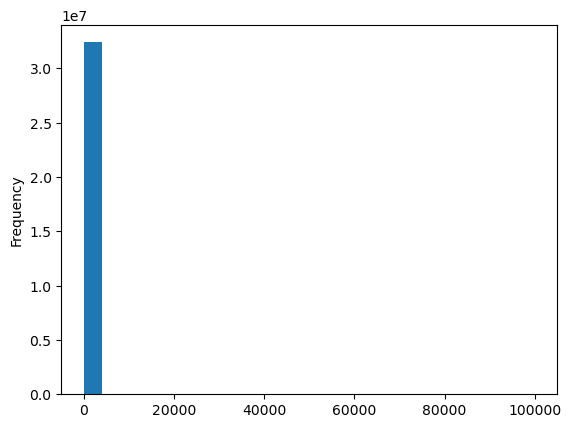

In [80]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [81]:
ords_prods_merge['prices'].mean()

11.980225638383468

In [82]:
ords_prods_merge['prices'].median()

7.4

In [83]:
ords_prods_merge['prices'].max()

99999.0

Spotting outliers and correcting them

In [85]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,_merge,busiest_days,price_range_loc,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,both,Regularly busy,High-range product,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,both,Busiest days,High-range product,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,both,Regularly busy,High-range product,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,both,Busiest days,High-range product,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,both,Regularly busy,High-range product,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,both,Busiest days,High-range product,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,both,Busiest days,High-range product,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,both,Regularly busy,High-range product,Most orders,15,Regular customer,451.153540,High spender,4.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,both,Regularly busy,High-range product,Average orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


# Since these outliers don't make any sense, let's mark them as missing (NaNs)

In [87]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

# Now check the maximum price

In [89]:
ords_prods_merge['prices'].max()

25.0

# Histogram

<Axes: ylabel='Frequency'>

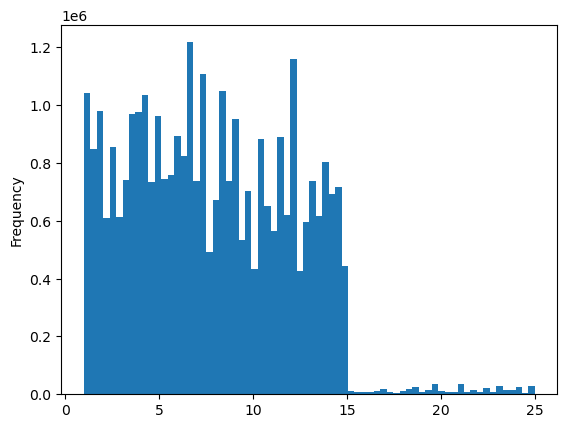

In [91]:
ords_prods_merge['prices'].plot.hist(bins = 70)

# Scatter Plot

<Axes: xlabel='prices', ylabel='prices'>

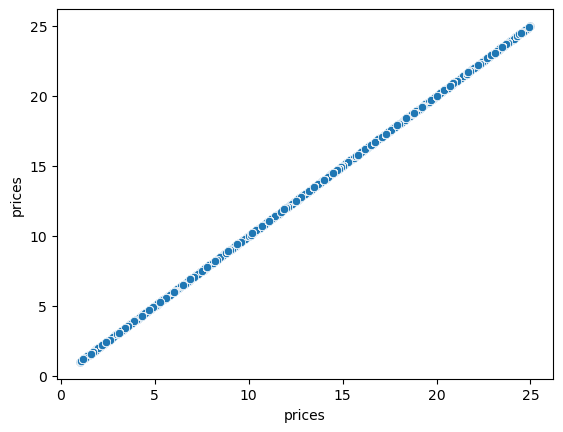

In [93]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

# Creating Line Charts

In [95]:
# Create a list holding True/False values to the test np.random.rant()<=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [96]:
# Store 70% of the sample in the dataframe big
big=ords_prods_merge[dev]

In [97]:
# Store 30% of the sample in the dataframe small
small=ords_prods_merge[~dev]

In [98]:
# Checking if big and small result in smake number of rows
len(big)+len(small)

32404859

In [99]:
df_2 = small[['orders_day_of_week','prices']]

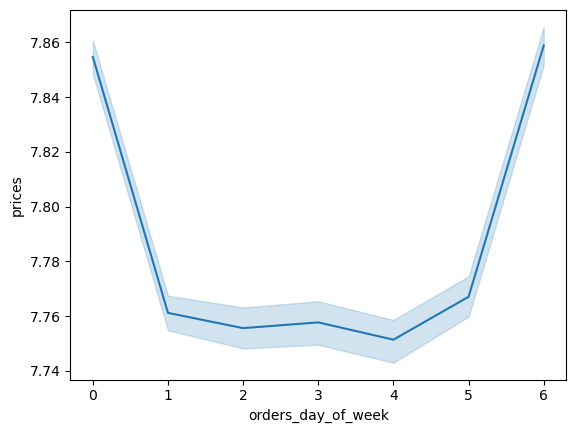

In [100]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [103]:
df_3 = big[['orders_day_of_week','prices']]

In [ ]:
line = sns.lineplot(data = df_3, x = 'orders_day_of_week',y = 'prices')

In [123]:
Final_df=pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'ords_prods_custs.pkl'))

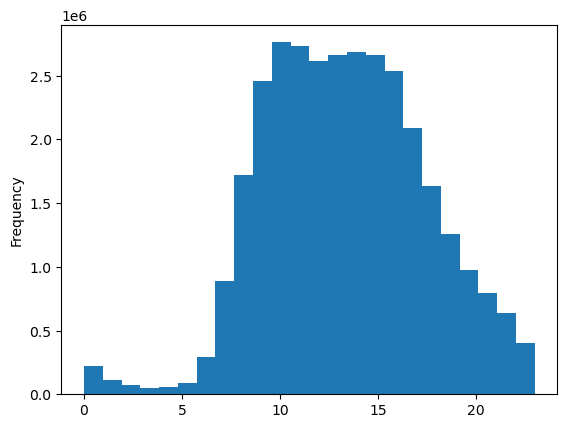

In [202]:
# Task 3
Histogram_hour_of_day=Final_df['order_hour_of_day'].plot.hist(bins = 24)                                

# 1. Its left-skewed which means that values are towards the higher end. In this case, it means that customers tend to order at later hours during the day. 

<Axes: xlabel='loyalty_flag'>

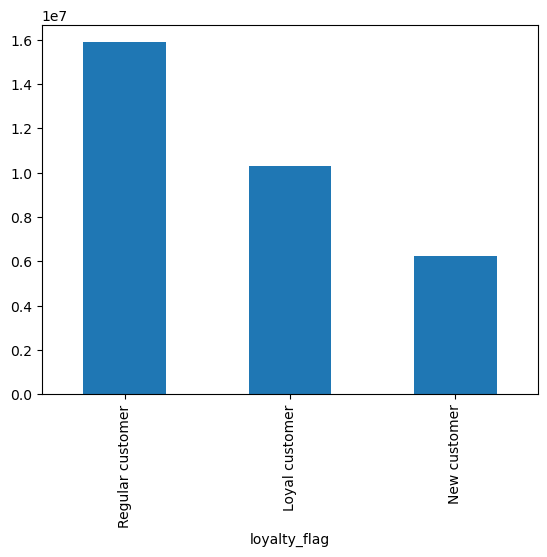

In [142]:
# Task 4
Final_df['loyalty_flag'].value_counts().plot.bar()

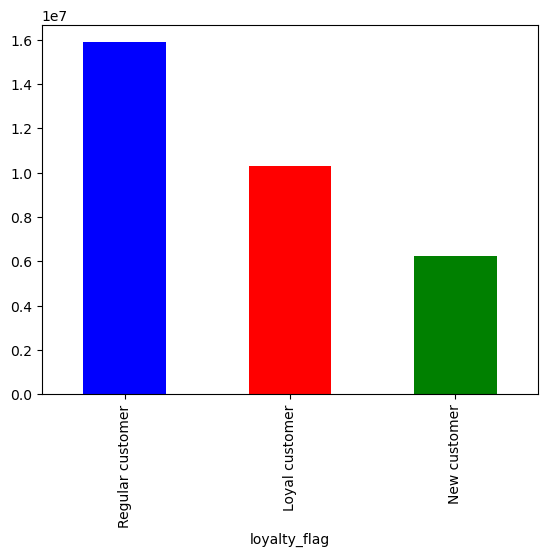

In [207]:
Bar_loyalty=Final_df['loyalty_flag'].value_counts().plot.bar(color=['blue','red','green'])

In [160]:
# Task 5 with accurate subset
np.random.seed(4)
dev = np.random.rand(len(Final_df)) <= 0.7
big = Final_df[dev]
small = Final_df[~dev]

In [164]:
len(Final_df)

32404859

In [166]:
len(big)+len(small)

32404859

In [170]:
Final_df_2 = small [['order_hour_of_day','prices']]

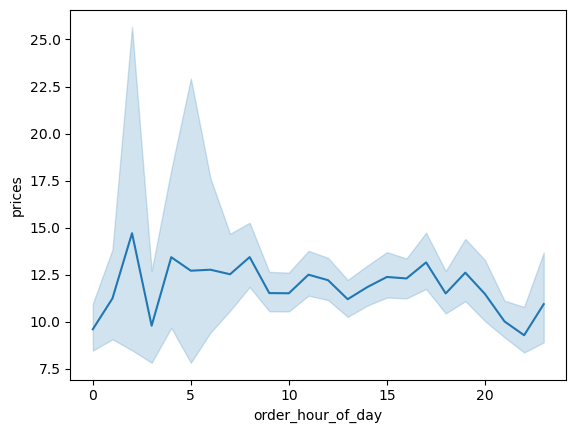

In [172]:
line = sns.lineplot(data = Final_df_2, x = 'order_hour_of_day',y = 'prices')

Task 6 I couldn't do this task because I removed 'n_dependants' while cleaning 'customers' dataset in the previous exercise. I have learnt my lesson, that one should not remove data even though it seems unnecessary. I have created a plot between age and prices to see if certain age group prefers certain price bracket.


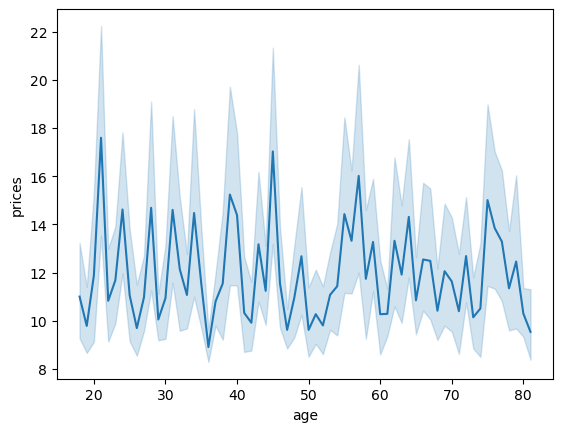

In [182]:
# Task 6
Final_df_3 = small [['age','prices']]
line_2 = sns.lineplot(data = Final_df_3, x = 'age',y = 'prices')

From the above chart one can see as age is increasing the prices are getting smaller, which is consistent with the norm "young and reckless shopping, old and wiser sense of spending money"  :) 

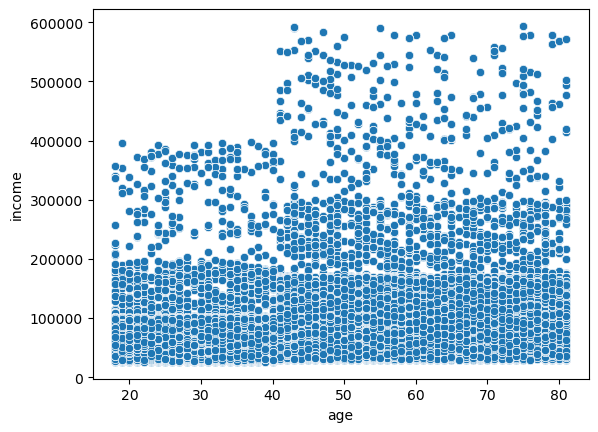

In [185]:
# Task 7
Final_df_4 = small [['age','income']]
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = Final_df_4)

There is no relatiohsip between age and income. But it can be seen that majority of customers earn within a certain bracket (untill 200,000). One can think that the group earning above 200,000 could be lured in with luxurious brands and premium services.

In [205]:
Histogram_hour_of_day.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Histogram_hour_of_day.png'))

In [209]:
Bar_loyalty.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Bar_loyalty.png'))

In [211]:
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_hour_of_day vs prices.png'))
line_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age vs prices.png'))
scatterplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatterplot_age vs income.png'))